# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
type(cities)

list

In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + 'jamestown').json()
response



{'coord': {'lon': -79.2353, 'lat': 42.097},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': -12.21,
  'feels_like': -16.78,
  'temp_min': -14.4,
  'temp_max': -11.27,
  'pressure': 1017,
  'humidity': 100},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 180},
 'clouds': {'all': 0},
 'dt': 1643606584,
 'sys': {'type': 1,
  'id': 4588,
  'country': 'US',
  'sunrise': 1643632258,
  'sunset': 1643668182},
 'timezone': -18000,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [31]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#query_url = url + "api-key=" + api_key + "&q=" + query
# For each city name in cities list, do below things...


city_name_list=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
temp_list=[]
wind_speed_list=[]
index_counter = 0
set_counter=0

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        temp_list.append(response['main']['temp'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("Data Retrieval Complete")

Processing Record 1 of Set 0 : rikitea
Processing Record 2 of Set 0 : dikson
Processing Record 3 of Set 0 : chicama
Processing Record 4 of Set 0 : ushuaia
Processing Record 5 of Set 0 : butaritari
City not found. Skipping...
Processing Record 6 of Set 0 : narsaq
Processing Record 7 of Set 0 : mataura
City not found. Skipping...
Processing Record 8 of Set 0 : port alfred
Processing Record 9 of Set 0 : albany
Processing Record 10 of Set 0 : fortuna
Processing Record 11 of Set 0 : san patricio
Processing Record 12 of Set 0 : beloha
Processing Record 13 of Set 0 : sola
City not found. Skipping...
Processing Record 14 of Set 0 : semey
City not found. Skipping...
Processing Record 15 of Set 0 : kaitangata
Processing Record 16 of Set 0 : pasni
Processing Record 17 of Set 0 : nanakuli
Processing Record 18 of Set 0 : suslovo
Processing Record 19 of Set 0 : castro
Processing Record 20 of Set 0 : gusau
Processing Record 21 of Set 0 : vaini
Processing Record 22 of Set 0 : busselton
Processing Reco

Processing Record 37 of Set 3 : naron
Processing Record 38 of Set 3 : bereda
Processing Record 39 of Set 3 : port elizabeth
Processing Record 40 of Set 3 : mormugao
Processing Record 41 of Set 3 : jaicos
Processing Record 42 of Set 3 : aksarka
Processing Record 43 of Set 3 : pevek
Processing Record 44 of Set 3 : alto araguaia
Processing Record 45 of Set 3 : hammerfest
Processing Record 46 of Set 3 : dieppe
Processing Record 47 of Set 3 : soyo
Processing Record 48 of Set 3 : carlisle
Processing Record 49 of Set 3 : buala
Processing Record 50 of Set 3 : payo
Processing Record 0 of Set 4 : rapid valley
Processing Record 1 of Set 4 : guymon
City not found. Skipping...
Processing Record 2 of Set 4 : komsomolskiy
Processing Record 3 of Set 4 : alakurtti
Processing Record 4 of Set 4 : lumphat
Processing Record 5 of Set 4 : iskateley
Processing Record 6 of Set 4 : the valley
Processing Record 7 of Set 4 : saint-philippe
Processing Record 8 of Set 4 : aklavik
Processing Record 9 of Set 4 : jesu

Processing Record 22 of Set 7 : huanren
Processing Record 23 of Set 7 : inta
Processing Record 24 of Set 7 : fomboni
City not found. Skipping...
Processing Record 25 of Set 7 : junin
Processing Record 26 of Set 7 : rio gallegos
Processing Record 27 of Set 7 : cockeysville
Processing Record 28 of Set 7 : tiarei
Processing Record 29 of Set 7 : erzin
Processing Record 30 of Set 7 : cantagallo
Processing Record 31 of Set 7 : nenagh
Processing Record 32 of Set 7 : shitanjing
Processing Record 33 of Set 7 : jeremie
Processing Record 34 of Set 7 : caxito
City not found. Skipping...
Processing Record 35 of Set 7 : sinnamary
City not found. Skipping...
Processing Record 36 of Set 7 : lubang
Processing Record 37 of Set 7 : hambantota
Processing Record 38 of Set 7 : acajutla
Processing Record 39 of Set 7 : orange cove
Processing Record 40 of Set 7 : huarmey
Processing Record 41 of Set 7 : asyut
Processing Record 42 of Set 7 : uthal
Processing Record 43 of Set 7 : touros
Processing Record 44 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_dict = {
    "city": city_name_list,
    "latitude":lat_list,
    "longitude":lng_list,
    "date":date_list,
    "temperature": temp_list,
    "humidity": humidity_list,
    "cloudiness":cloudiness_list,
    "wind speed": wind_speed_list,
}

In [33]:
weather_df=pd.DataFrame(weather_dict)
weather_df

,city,latitude,longitude,date,temperature,humidity,cloudiness,wind speed
0,Rikitea,-23.1203,-134.9692,1643609638,77.27,63,100,5.53
1,Dikson,73.5069,80.5464,1643609639,-3.37,94,100,22.30
2,Chicama,-7.8447,-79.1469,1643609639,64.94,85,96,3.36
3,Ushuaia,-54.8000,-68.3000,1643609639,42.46,75,100,8.05
4,Butaritari,3.0707,172.7902,1643609530,82.06,77,55,18.97
...,...,...,...,...,...,...,...,...
530,Tazmalt,36.3868,4.3989,1643609839,45.97,37,0,3.51
531,Turukhansk,65.8167,87.9833,1643609839,1.45,93,99,12.35
532,Flinders,-34.5833,150.8552,1643609840,82.74,71,28,4.00
533,Nouadhibou,20.9310,-17.0347,1643609840,64.38,72,100,19.57


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

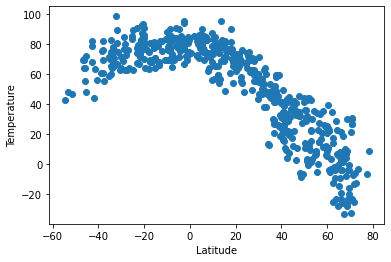

In [34]:
x_values = weather_df['latitude']
y_values = weather_df['temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

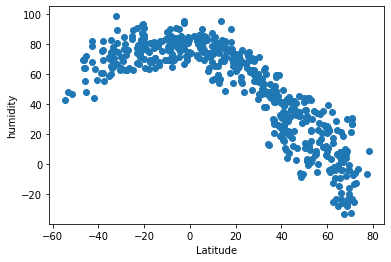

In [35]:
x_values = weather_df['latitude']
y_values = weather_df['temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.show()

## Latitude vs. Cloudiness Plot

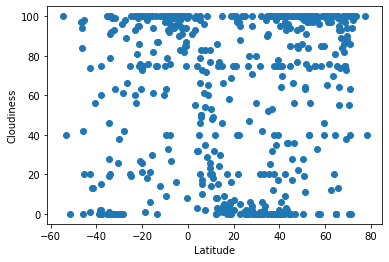

In [36]:
x_values = weather_df['latitude']
y_values = weather_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

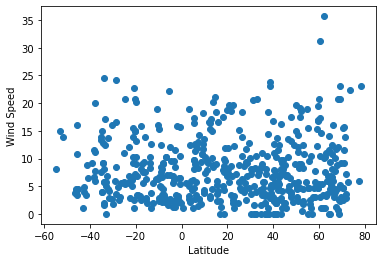

In [37]:
x_values = weather_df['latitude']
y_values = weather_df['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [38]:
def linear_regession(x,y):
    (slope,intercepts,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq="y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [41]:
northern_hemi=weather_df.loc[weather_df["latitude"]>=0]
southern_hemi=weather_df.loc[weather_df["latitude"]<0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

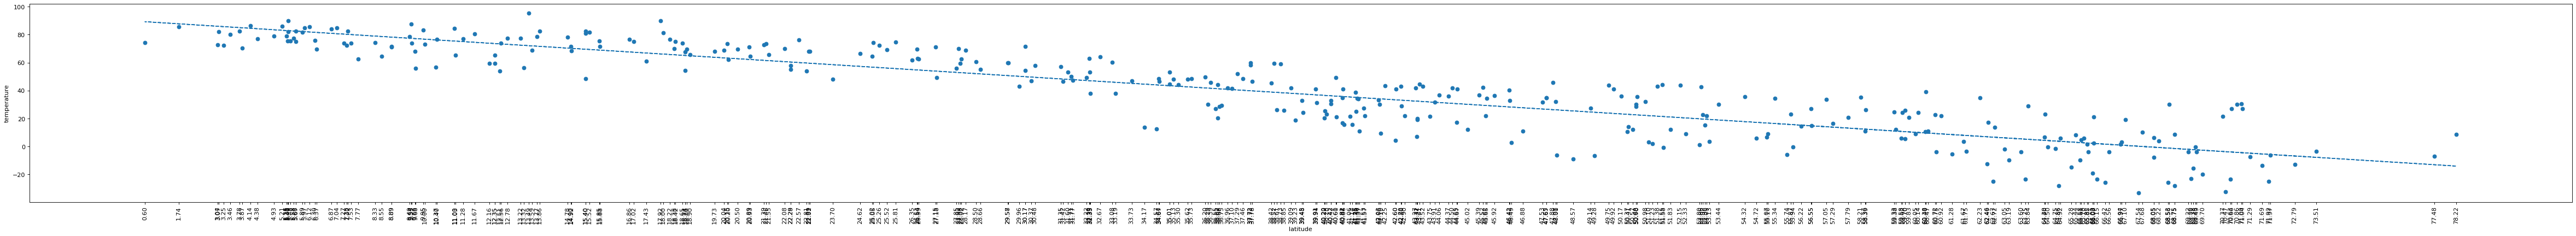

In [48]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["temperature"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["temperature"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

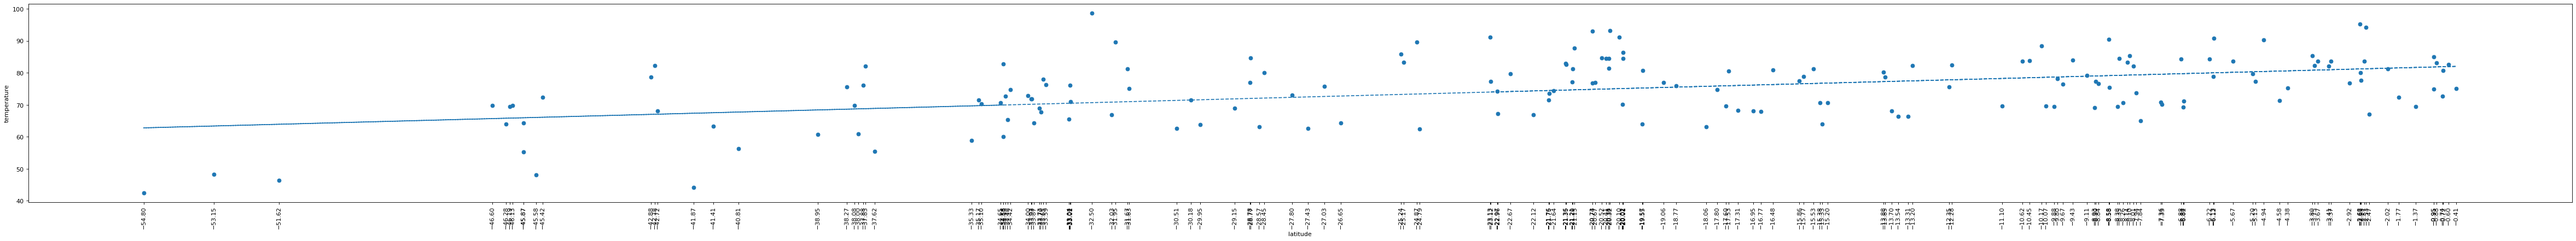

In [50]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["temperature"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["temperature"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

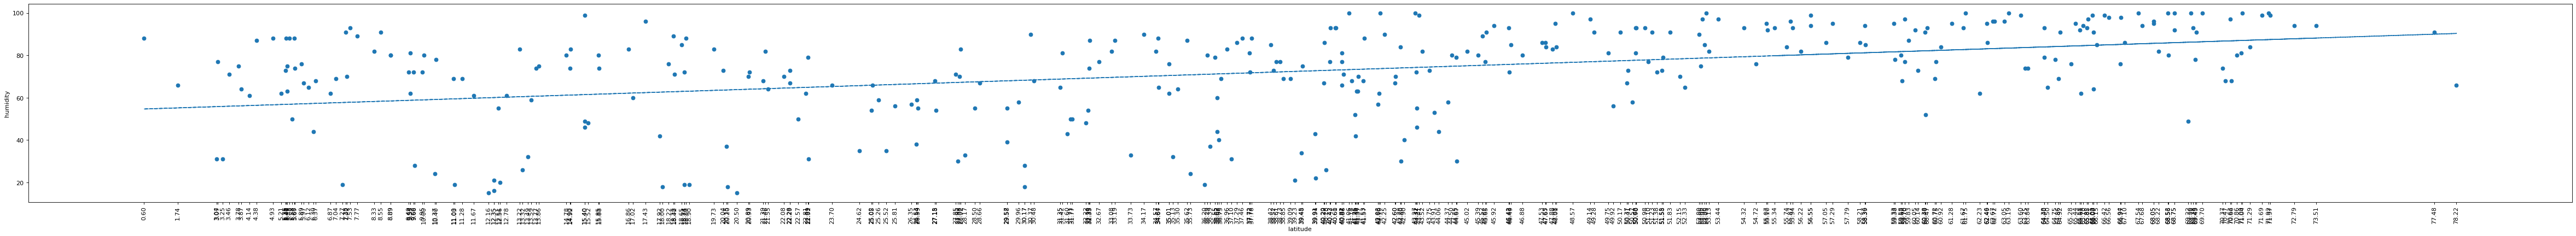

In [51]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["humidity"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["humidity"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

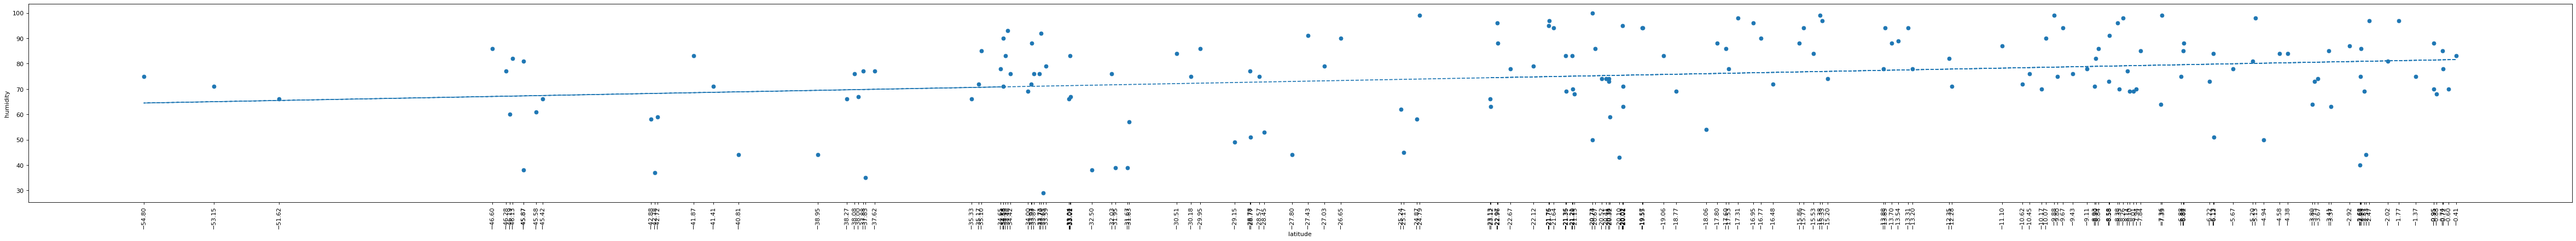

In [52]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["humidity"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["humidity"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

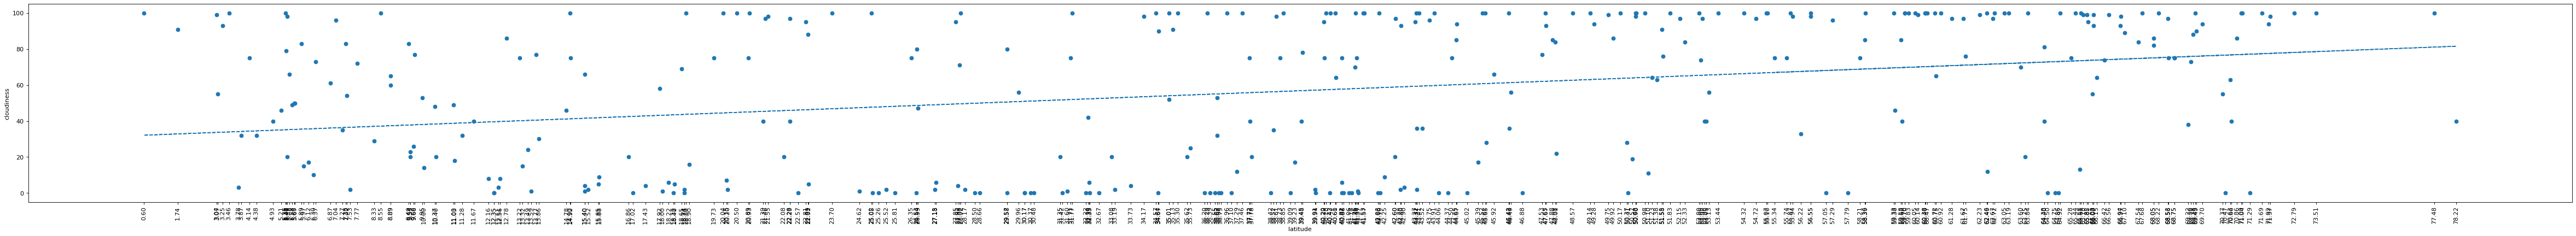

In [53]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["cloudiness"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["cloudiness"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

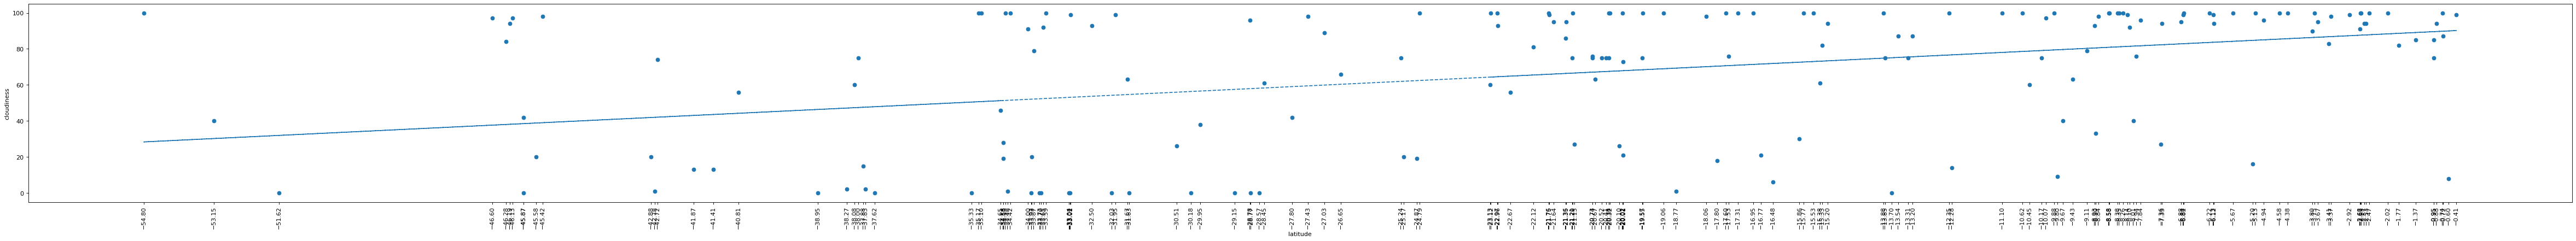

In [54]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["cloudiness"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["cloudiness"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

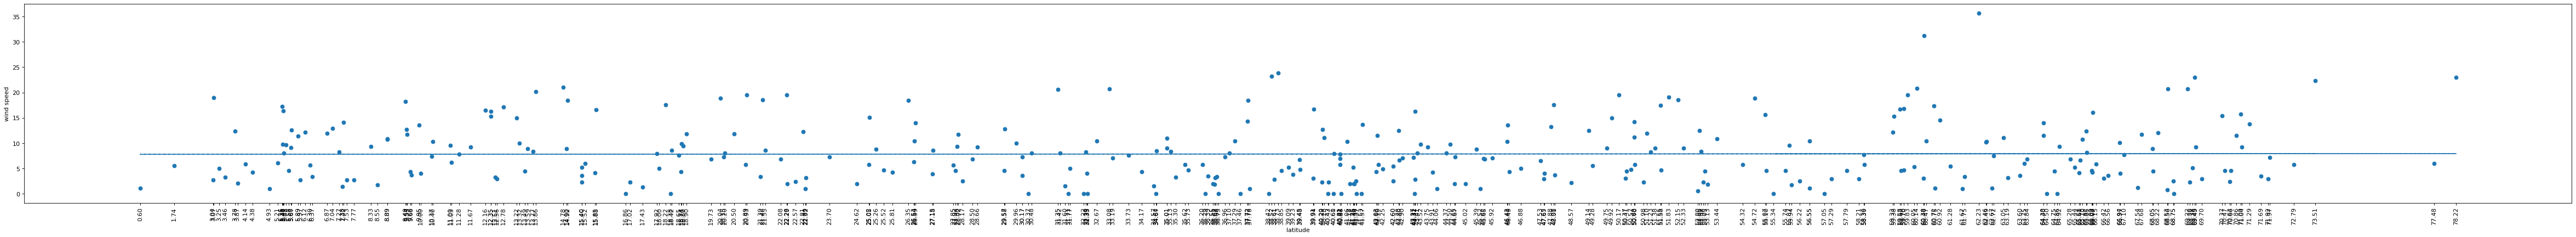

In [56]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["wind speed"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["wind speed"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

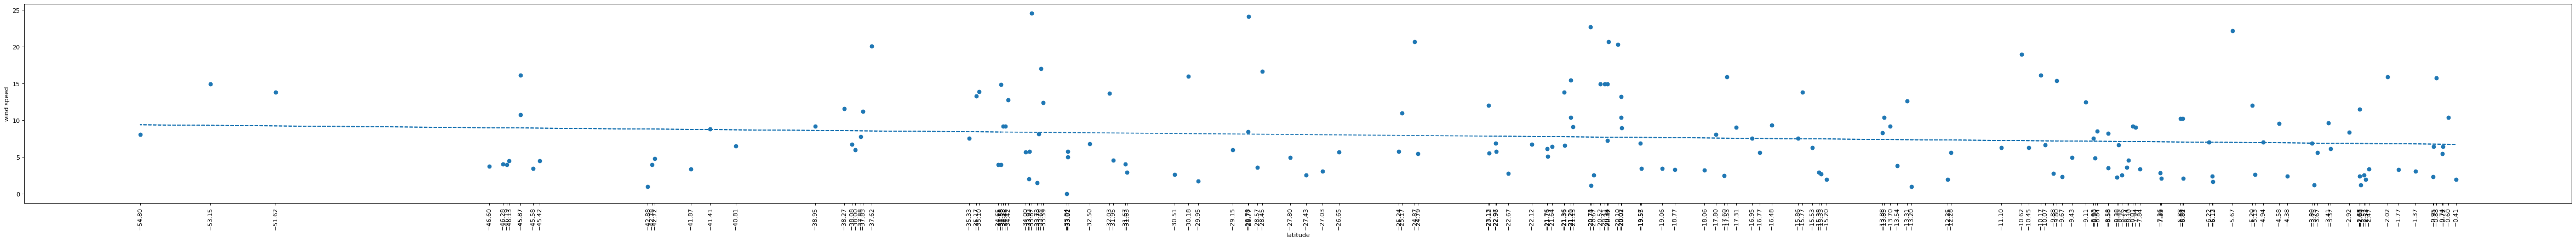

In [57]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["wind speed"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["wind speed"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.show()